In [2]:
import anndata
adata6=anndata.read_h5ad('../data/scvelo-pancreas.h5ad')
adata2=anndata.read_h5ad('../data/tsp1_bladder_mesenchymeToMyofibroblast_forPaper.h5ad')
adata1=anndata.read_h5ad('../data/tsp2_bladder_mesenchymeToMyofibroblast_forPaper.h5ad')

In [5]:
import scltnn
scpancera=scltnn.models.scLTNN(adata6)
scpancera.load_model('../model/my_model1.h5')
#scpancera.cal_high_variable_genes()
scpancera.cal_lsi(n_components=100)
scpancera.cal_paga(resolution=1.0)
scpancera.cal_model_time()
scpancera.cal_rps_value(species='mouse')
scpancera.cal_dpt_pseudotime(leiden_range=0.01)
scpancera.ANN(batch_size=30,epochs=10,verbose=0)
scpancera.cal_distrubute()
scpancera.cal_scLTNN_time()

2022-07-28 01:42:11.648186: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 01:42:11.648799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
......calculate lsi
......calculate paga
......predict model_time


2022-07-28 01:42:16.734146: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-28 01:42:16.787182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


......calculate RPS value
......calculate dpt_pseudotime
......leiden_start ['7', '14'] leiden_end ['2']
......ANN
Model: "scLTNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 577,537
Trainable params: 577,537
Non-trainable params: 0
_________________________________________________________________
None


2022-07-28 01:42:17.417525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-28 01:42:17.778864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


......ANN:loss 0.01861230656504631 MAE 0.10545646399259567
......predicted ANN Time


2022-07-28 01:42:19.218424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


......Dweibull analysis
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 92.8354] [loc=0.534 scale=0.355]
[distfit] >[expon     ] [0.00 sec] [RSS: 85.8612] [loc=0.000 scale=0.534]
[distfit] >[pareto    ] [0.05 sec] [RSS: 84.3839] [loc=-91416821.415 scale=91416821.415]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 64.4709] [loc=0.447 scale=0.379]
[distfit] >[t         ] [0.03 sec] [RSS: 92.835] [loc=0.534 scale=0.355]
[distfit] >[genextreme] [0.03 sec] [RSS: 77.2495] [loc=0.497 scale=0.397]
[distfit] >[gamma     ] [0.03 sec] [RSS: 93.3241] [loc=-5.047 scale=0.023]
[distfit] >[lognorm   ] [0.07 sec] [RSS: 92.9369] [loc=-57.794 scale=58.324]
[distfit] >[beta      ] [0.05 sec] [RSS: 76.726] [loc=-0.088 scale=1.088]
[distfit] >[uniform   ] [0.00 sec] [RSS: 76.2608] [loc=0.000 scale=1.000]
[distfit] >[loggamma  ] [0.01 sec] [RSS: 65.7125] [loc=0.948 scale=0.020]
[distfit] >Compute confidence interval [parametric]
......Norm analysis
[distfit] >fit..
[distfit] >tran

In [7]:
import pandas as pd
leiden_dpt_pd=pd.DataFrame(columns=['Time_value'])
for i in set(scpancera.adata_test.obs['leiden']):
    leiden_dpt_pd.loc[i]={'Time_value':scpancera.adata_test.obs.loc[scpancera.adata_test.obs['leiden']==i,'dpt_pseudotime'].mean()}
leiden_dpt_pd=leiden_dpt_pd.sort_values('Time_value') 
leiden_sum=len(leiden_dpt_pd)
leiden_middle=leiden_sum//2


In [ ]:
leiden_pd.loc[leiden_pd['Time_value']<leiden_pd.loc[leiden_pd.index[0]].values[0]+leiden_range].index.tolist()

In [19]:
leiden_dpt_pd.iloc[leiden_middle].values[0]

0.71244204

In [22]:

leiden_middle_index=leiden_dpt_pd.iloc[leiden_middle].name
leiden_middle_value=leiden_dpt_pd.iloc[leiden_middle].values[0]

leiden_dpt_pd.loc[(leiden_dpt_pd['Time_value']<leiden_middle_value+0.05)&
                  (leiden_dpt_pd['Time_value']>leiden_middle_value-0.05)].index.tolist()

['15', '12']

In [11]:
leiden_dpt_pd

,Time_value
7,0.032115
14,0.050863
10,0.054323
0,0.094151
6,0.218476
16,0.407411
4,0.476008
9,0.578274
15,0.712442
12,0.727099


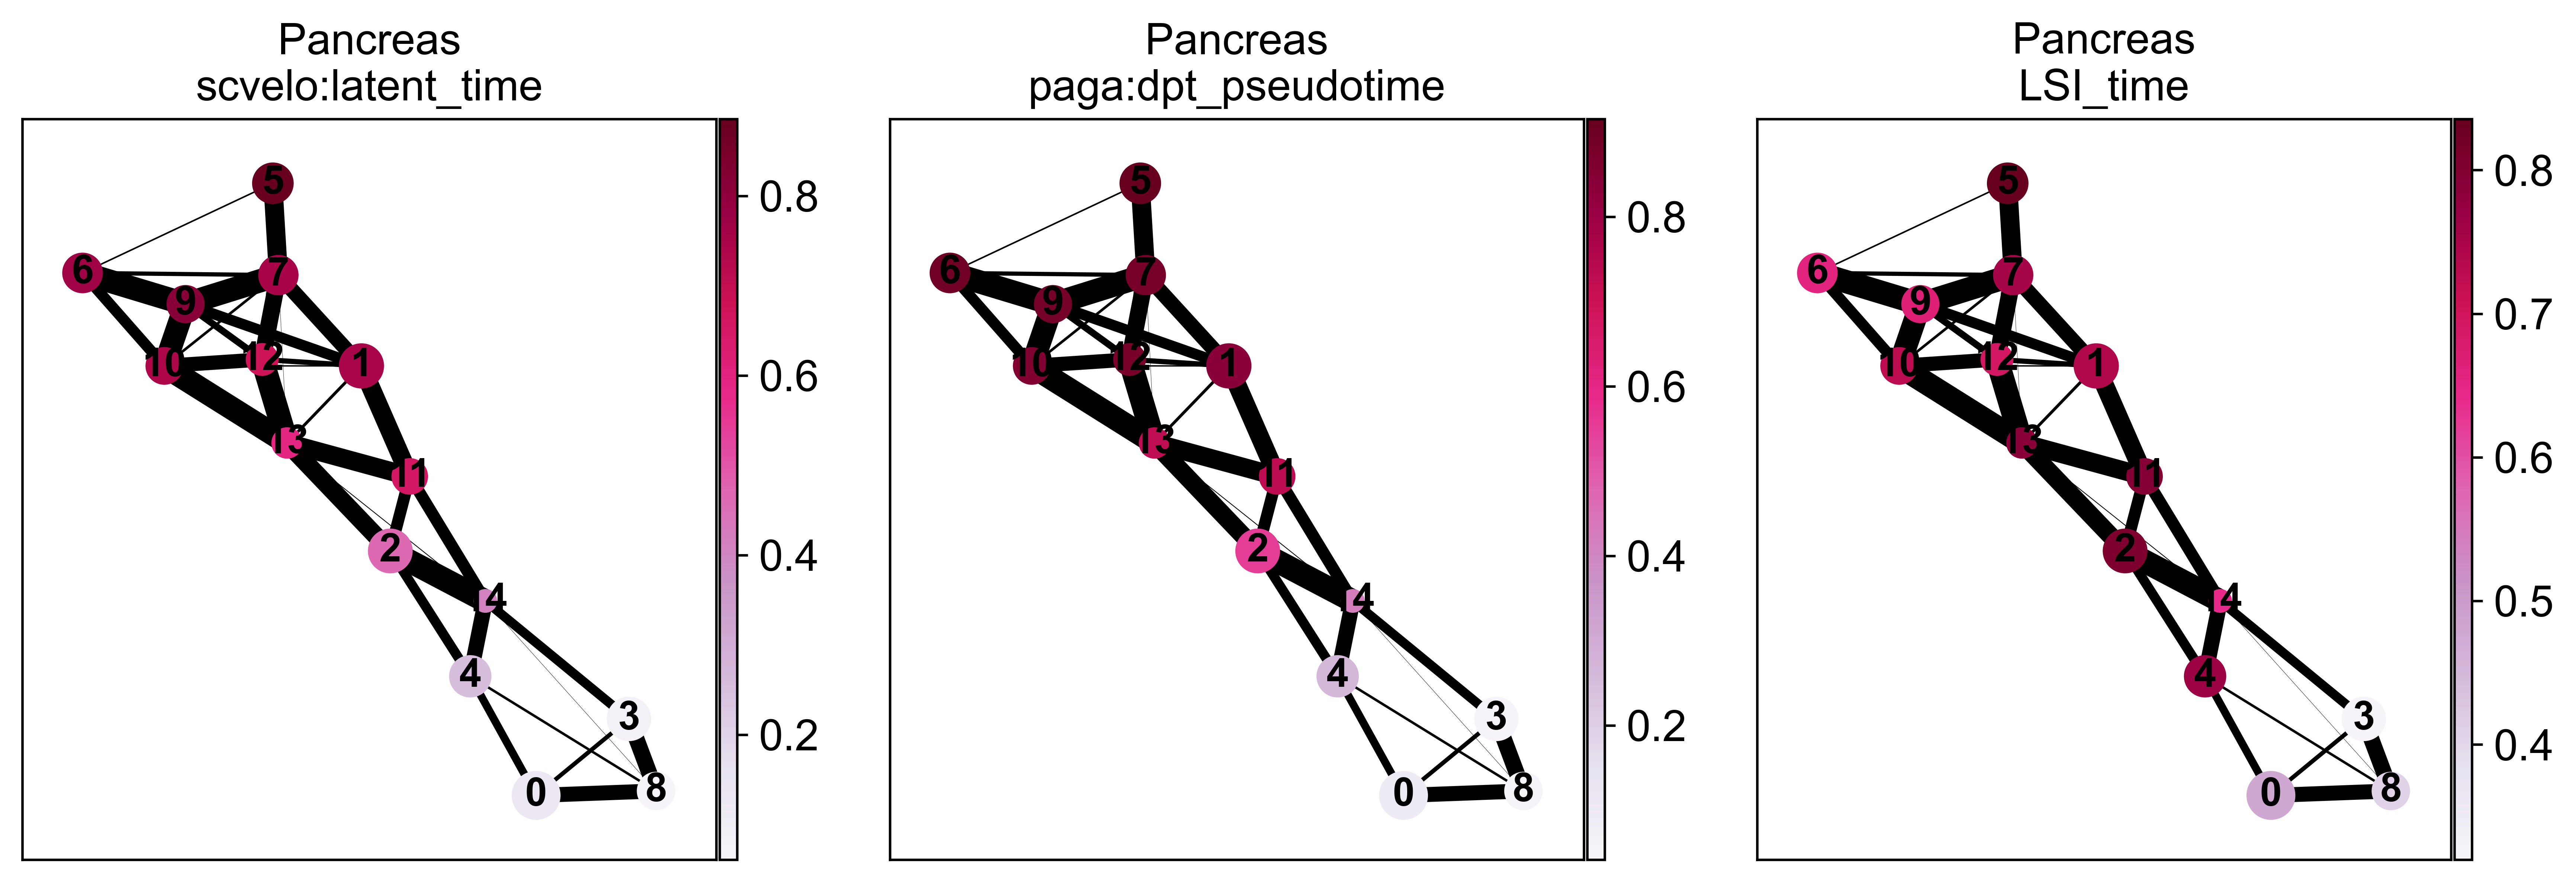

In [4]:
import scanpy as sc
sc.settings.set_figure_params(dpi=300, facecolor='white')
sc.pl.paga(scpancera.adata_test, color=['latent_time','dpt_pseudotime','p_latent_time'],cmap='PuRd',
          title=['Pancreas\nscvelo:latent_time','Pancreas\npaga:dpt_pseudotime','Pancreas\nLSI_time'],
          save='_fig3_pancreas.png')

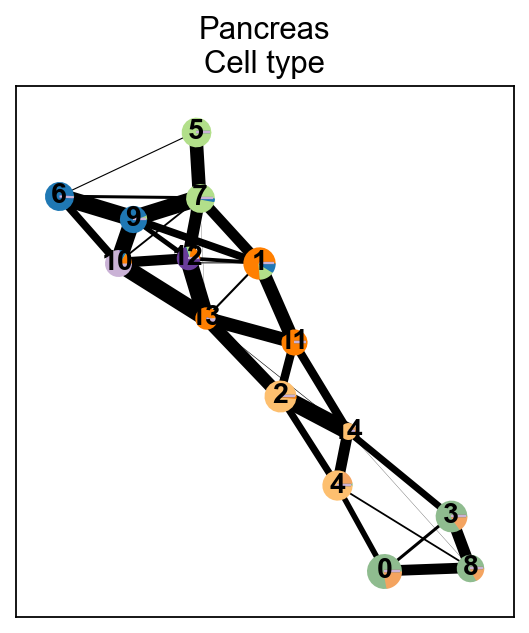

In [21]:
sc.pl.paga(scpancera.adata_test, color=['clusters'],
          title=['Pancreas\nCell type'],save='_fig3_pancreas_cell.png')

saving figure to file ./figures/scvelo__fig3_pancreas_clusters.png


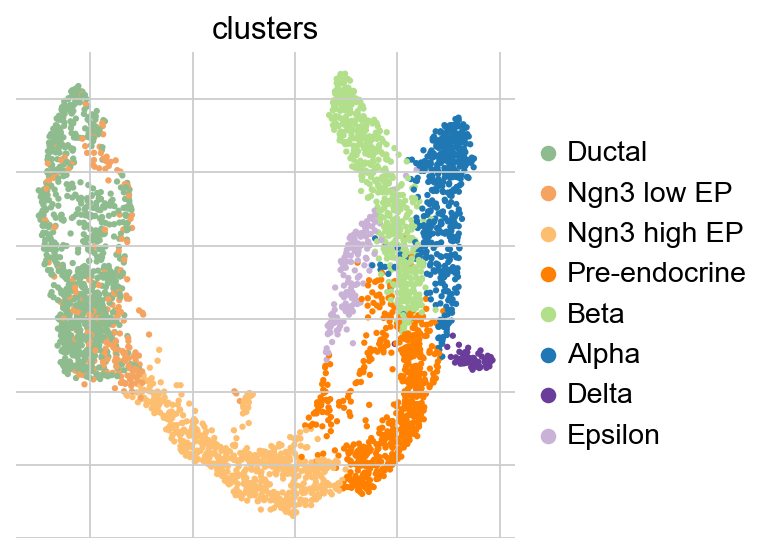

In [22]:
import scvelo as scv
scv.pl.scatter(scpancera.adata_test, color=['clusters'], cmap='gnuplot',
               legend_loc='right margin',save='_fig3_pancreas_clusters.png')

In [5]:
import scLTNN
scpancera=scLTNN.scLTNN(adata2)
scpancera.load_model('my_model1.h5')
#scpancera.cal_high_variable_genes()
scpancera.cal_lsi(n_components=100)
scpancera.cal_paga(resolution=1.0)
scpancera.cal_model_time()
scpancera.cal_rps_value(species='human')
scpancera.cal_dpt_pseudotime(leiden_range=0.03)
scpancera.CNN(batch_size=30,epochs=10,verbose=0)
scpancera.cal_distrubute()
scpancera.cal_scLTNN_time()

......calculate lsi
......calculate paga
......predict model_time


2022-07-04 19:06:31.753956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


......calculate RPS value
......calculate dpt_pseudotime
......leiden_start ['0', '5'] leiden_end ['4']
......CNN
Model: "scLTNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               51712     
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 577,537
Trainable params: 577,537
Non-trainable params: 0
_________________________________________________________________
None


2022-07-04 19:06:32.380885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-04 19:06:32.773292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


......CNN:loss 0.014379258267581463 MAE 0.08637978136539459
......predicted CNN Time


2022-07-04 19:06:35.928277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


......Dweibull analysis
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 170.556] [loc=0.141 scale=0.134]
[distfit] >[expon     ] [0.00 sec] [RSS: 128.806] [loc=0.000 scale=0.141]
[distfit] >[pareto    ] [0.06 sec] [RSS: 128.625] [loc=-25656275.132 scale=25656275.132]
[distfit] >[dweibull  ] [0.00 sec] [RSS: 151.385] [loc=0.111 scale=0.100]
[distfit] >[t         ] [0.02 sec] [RSS: 46.1905] [loc=0.064 scale=0.029]
[distfit] >[genextreme] [0.05 sec] [RSS: 41.4572] [loc=0.069 scale=0.049]
[distfit] >[gamma     ] [0.01 sec] [RSS: 102.441] [loc=-0.000 scale=0.095]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 65.0454] [loc=-0.001 scale=0.099]
[distfit] >[beta      ] [0.06 sec] [RSS: 101.568] [loc=-0.000 scale=2075640530072.534]
[distfit] >[uniform   ] [0.00 sec] [RSS: 244.187] [loc=0.000 scale=1.000]
[distfit] >[loggamma  ] [0.03 sec] [RSS: 170.717] [loc=-42.156 scale=5.668]
[distfit] >Compute confidence interval [parametric]
......Norm analysis
[distfit] >fit..
[

In [28]:
scpancera.adata_test

AnnData object with n_obs × n_vars = 3965 × 2000
    obs: 'X10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'method', 'donor', 'X10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', 'X10X_sample', 'anatomical_position', 'X10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated.Annotation', 'Entropy.All.Methods', 'Entropy.kNN.Reps', 'Entropy.scANVI.Reps', 'Entropy.SVM.Reps', 'Potential.Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated.Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes', 'donor_method', 'decontX_c

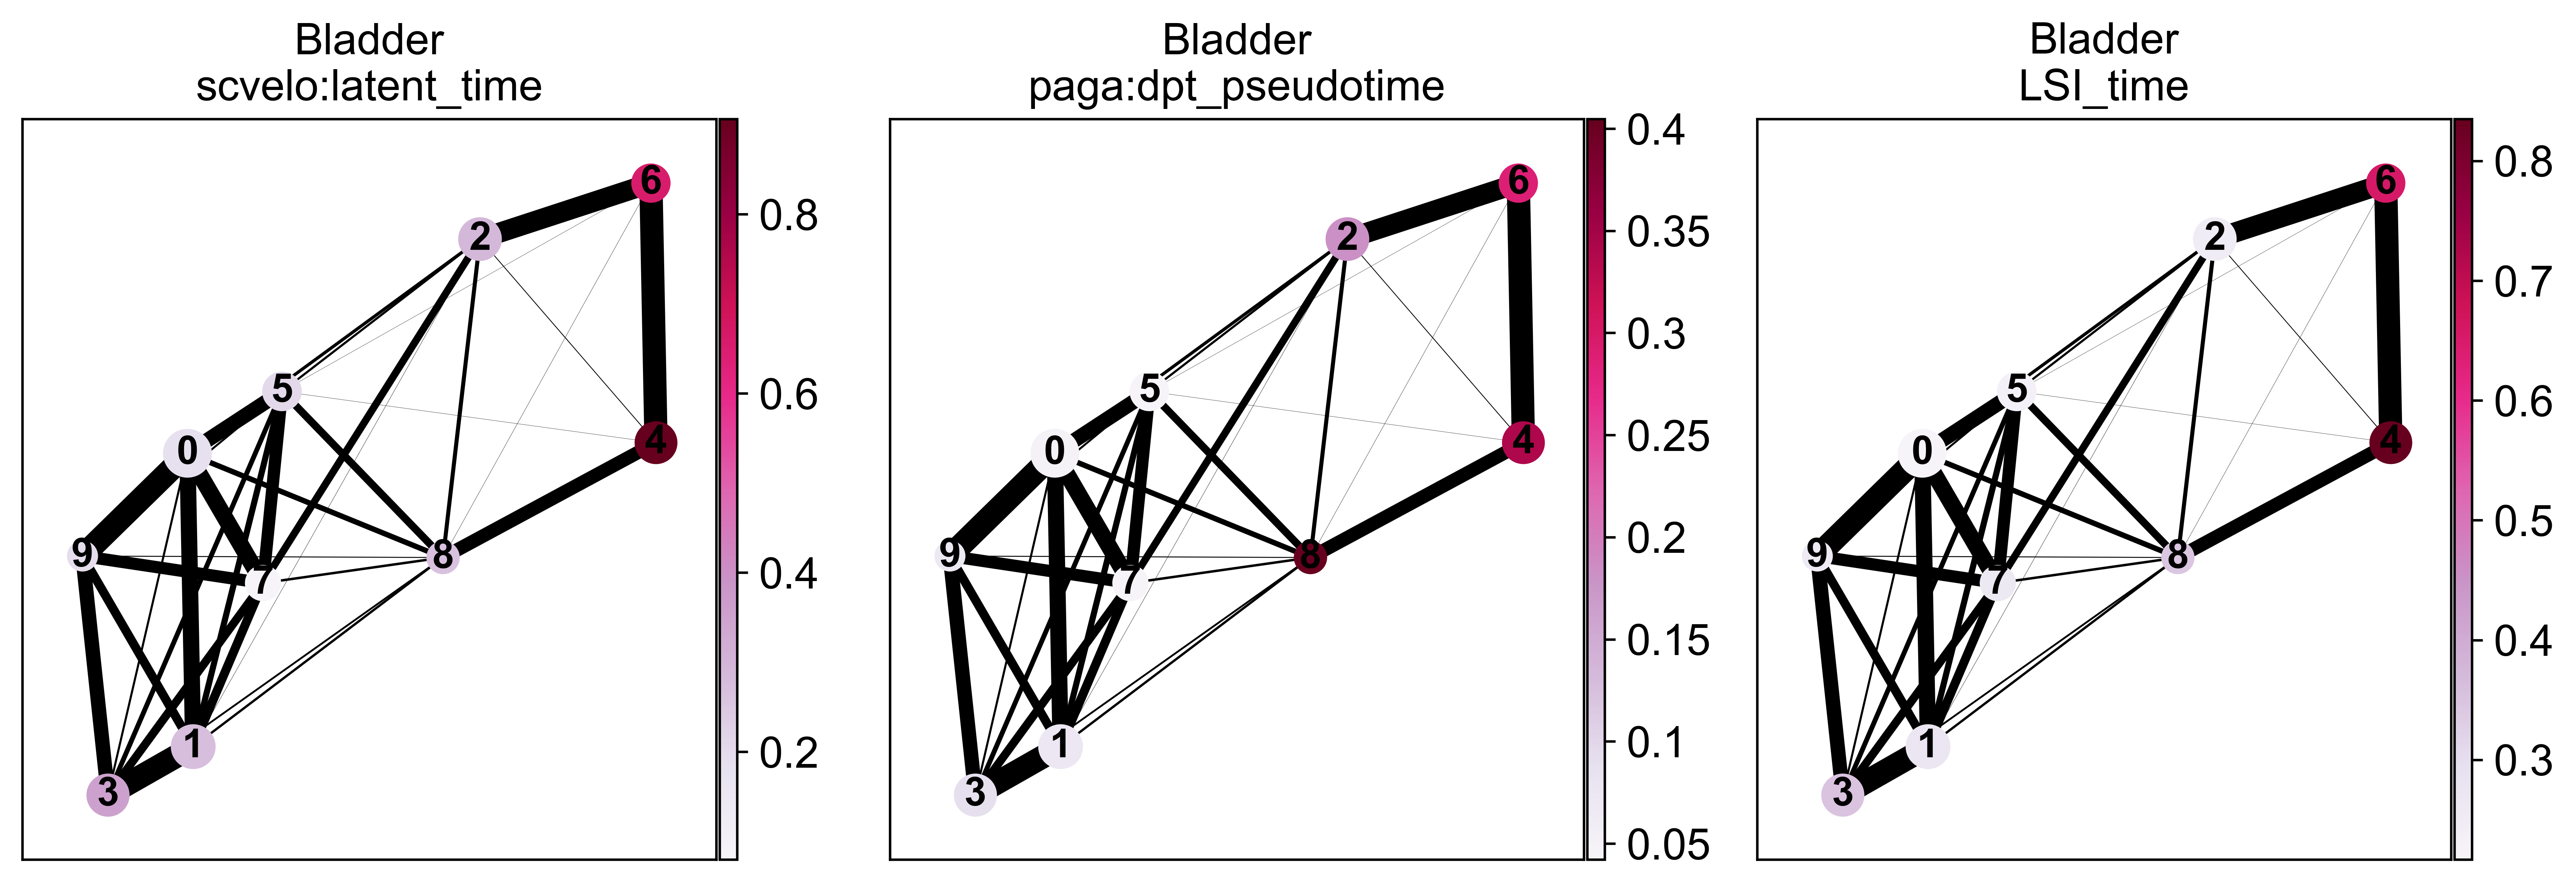

In [6]:
import scanpy as sc
sc.settings.set_figure_params(dpi=300, facecolor='white')
sc.pl.paga(scpancera.adata_test, color=['latent_time','dpt_pseudotime','p_latent_time'],cmap='PuRd',
          title=['Bladder\nscvelo:latent_time','Bladder\npaga:dpt_pseudotime','Bladder\nLSI_time'],
          save='_fig3_bladder.png')

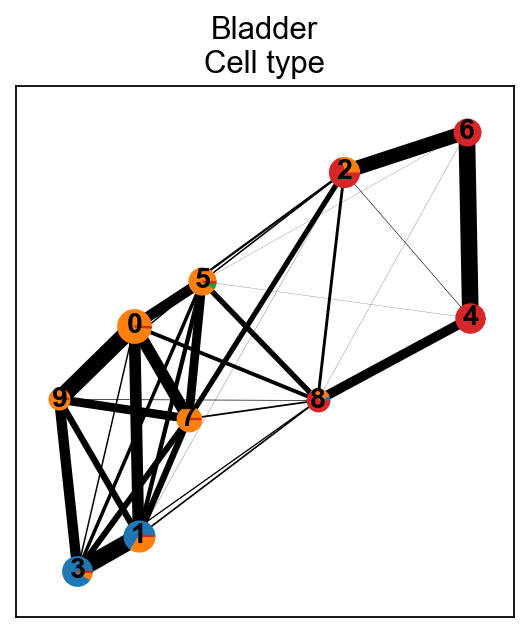

In [29]:
sc.pl.paga(scpancera.adata_test, color=['manual_cell_ontology_class'],
          title=['Bladder\nCell type'],save='_fig3_Bladder_cell.png')

saving figure to file ./figures/scvelo__fig3_Bladder_clusters.png


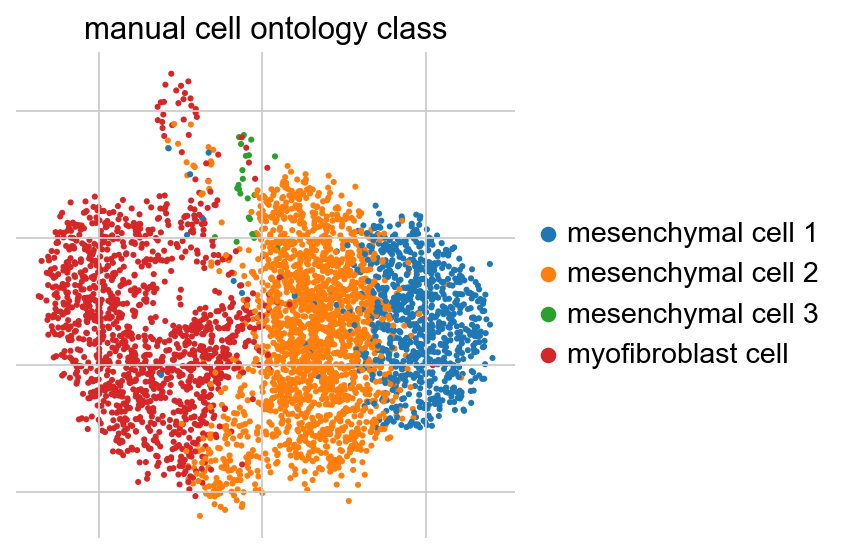

In [30]:
import scvelo as scv
scv.pl.scatter(scpancera.adata_test, color=['manual_cell_ontology_class'], cmap='gnuplot',
               legend_loc='right margin',save='_fig3_Bladder_clusters.png')